In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.datasets import make_classification
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,confusion_matrix,auc, classification_report
import warnings
warnings.filterwarnings('ignore')

# Importing Raw Data

In [81]:
raw_data = pd.read_csv('../Sych/Customer-Attrition.csv')

#### Checking top 5 rows of the raw data.

In [82]:
raw_data.head()

,ClientID,Gender,IsSenior,HasPartner,HasDependents,ServiceDuration,HasPhoneService,HasMultiplePhoneServices,InternetServiceType,HasCloudSecurity,...,HasDeviceCoverage,HasTechSupport,HasStreamingTV,HasStreamingMovies,SubscriptionType,HasElectronicBilling,PaymentMethod,MonthlySubscriptionFee,TotalSubscriptionCost,HasAttrited
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

#### Dropping ClientID column as it wont contribute to the model finding patterns.

In [83]:
raw_data = raw_data.drop('ClientID',axis = 1)

#### Checking raw data information , null values and data types.
##### ‣ There are no null values.
##### ‣ In total we have 20 columns (19 features, 1 target).
##### ‣ We have total of 16 categorical columns and 4 numerical columns.

In [84]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    7043 non-null   object 
 1   IsSenior                  7043 non-null   int64  
 2   HasPartner                7043 non-null   object 
 3   HasDependents             7043 non-null   object 
 4   ServiceDuration           7043 non-null   int64  
 5   HasPhoneService           7043 non-null   object 
 6   HasMultiplePhoneServices  7043 non-null   object 
 7   InternetServiceType       7043 non-null   object 
 8   HasCloudSecurity          7043 non-null   object 
 9   HasCloudBackup            7043 non-null   object 
 10  HasDeviceCoverage         7043 non-null   object 
 11  HasTechSupport            7043 non-null   object 
 12  HasStreamingTV            7043 non-null   object 
 13  HasStreamingMovies        7043 non-null   object 
 14  Subscrip

In [85]:
raw_data.isnull().sum()

Gender                      0
IsSenior                    0
HasPartner                  0
HasDependents               0
ServiceDuration             0
HasPhoneService             0
HasMultiplePhoneServices    0
InternetServiceType         0
HasCloudSecurity            0
HasCloudBackup              0
HasDeviceCoverage           0
HasTechSupport              0
HasStreamingTV              0
HasStreamingMovies          0
SubscriptionType            0
HasElectronicBilling        0
PaymentMethod               0
MonthlySubscriptionFee      0
TotalSubscriptionCost       0
HasAttrited                 0
dtype: int64

#### Separating categorical columns.
#### Dropping TotalSubscriptionCost as it is a numerical column.

In [86]:
categorical = raw_data.select_dtypes('object')
categorical = categorical.drop('TotalSubscriptionCost',axis = 1)
categorical

,Gender,HasPartner,HasDependents,HasPhoneService,HasMultiplePhoneServices,InternetServiceType,HasCloudSecurity,HasCloudBackup,HasDeviceCoverage,HasTechSupport,HasStreamingTV,HasStreamingMovies,SubscriptionType,HasElectronicBilling,PaymentMethod,HasAttrited
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


#### Converting TotalSubscriptionCost column to numeric datatype.

In [87]:
TotalSubscriptionCost = pd.to_numeric(raw_data['TotalSubscriptionCost'],errors = 'coerce')

#### Concatenating all the numerical columns together.

In [88]:
numerical = pd.concat([ raw_data.select_dtypes('float'),raw_data.select_dtypes('int'),TotalSubscriptionCost],axis = 1)
numerical

,MonthlySubscriptionFee,IsSenior,ServiceDuration,TotalSubscriptionCost
0,29.85,0,1,29.85
1,56.95,0,34,1889.50
2,53.85,0,2,108.15
3,42.30,0,45,1840.75
4,70.70,0,2,151.65
...,...,...,...,...
7038,84.80,0,24,1990.50
7039,103.20,0,72,7362.90
7040,29.60,0,11,346.45
7041,74.40,1,4,306.60


#### Checking for null in numerical values.
#### We have 11 null values for TotalSubscriptionCost.

In [89]:
numerical.isnull().sum()

MonthlySubscriptionFee     0
IsSenior                   0
ServiceDuration            0
TotalSubscriptionCost     11
dtype: int64

#### Checking for how many times categorical values repeated in each column.

In [90]:
for a in categorical.columns:
    print(categorical[a].value_counts())
    print('<---------------------------------------------------------->')

Male      3555
Female    3488
Name: Gender, dtype: int64
<---------------------------------------------------------->
No     3641
Yes    3402
Name: HasPartner, dtype: int64
<---------------------------------------------------------->
No     4933
Yes    2110
Name: HasDependents, dtype: int64
<---------------------------------------------------------->
Yes    6361
No      682
Name: HasPhoneService, dtype: int64
<---------------------------------------------------------->
No                  3390
Yes                 2971
No phone service     682
Name: HasMultiplePhoneServices, dtype: int64
<---------------------------------------------------------->
Fiber optic    3096
DSL            2421
No             1526
Name: InternetServiceType, dtype: int64
<---------------------------------------------------------->
No                     3498
Yes                    2019
No internet service    1526
Name: HasCloudSecurity, dtype: int64
<---------------------------------------------------------->
No

#### Replacing values.

In [91]:
categorical['Gender'] = categorical.Gender.replace('Male',1).replace('Female',0)
categorical['HasPartner'] = categorical.HasPartner.replace('Yes',1).replace('No',0)
categorical['HasDependents'] = categorical.HasDependents.replace('Yes',1).replace('No',0)
categorical['HasPhoneService'] = categorical.HasPhoneService.replace('Yes',1).replace('No',0)
categorical['HasMultiplePhoneServices'] = categorical.HasMultiplePhoneServices.replace('No phone service',2).replace('Yes',1).replace('No',0)
categorical['InternetServiceType'] = categorical.InternetServiceType.replace('Fiber optic',2).replace('DSL',1).replace('No',0)
categorical['HasCloudSecurity'] = categorical.HasCloudSecurity.replace('No internet service',2).replace('Yes',1).replace('No',0)
categorical['HasCloudBackup'] = categorical.HasCloudBackup.replace('No internet service',2).replace('Yes',1).replace('No',0)
categorical['HasDeviceCoverage'] = categorical.HasDeviceCoverage.replace('No internet service',2).replace('Yes',1).replace('No',0)
categorical['HasTechSupport'] = categorical.HasTechSupport.replace('No internet service',2).replace('Yes',1).replace('No',0)
categorical['HasStreamingTV'] = categorical.HasStreamingTV.replace('No internet service',2).replace('Yes',1).replace('No',0)
categorical['HasStreamingMovies'] = categorical.HasStreamingMovies.replace('No internet service',2).replace('Yes',1).replace('No',0)
categorical['SubscriptionType'] = categorical.SubscriptionType.replace('Month-to-month',2).replace('Two year',1).replace('One year',0)
categorical['HasElectronicBilling'] = categorical.HasElectronicBilling.replace('Yes',1).replace('No',0)
categorical['PaymentMethod'] = categorical.PaymentMethod.replace('Electronic check',3).replace('Mailed check',2).replace('Bank transfer (automatic)',1).replace('Credit card (automatic)',0)
categorical['HasAttrited'] = categorical.HasAttrited.replace('Yes',1).replace('No',0)

#### Concatenating all the columns together.

In [92]:
data = pd.concat([categorical,numerical],axis = 1)
data

,Gender,HasPartner,HasDependents,HasPhoneService,HasMultiplePhoneServices,InternetServiceType,HasCloudSecurity,HasCloudBackup,HasDeviceCoverage,HasTechSupport,HasStreamingTV,HasStreamingMovies,SubscriptionType,HasElectronicBilling,PaymentMethod,HasAttrited,MonthlySubscriptionFee,IsSenior,ServiceDuration,TotalSubscriptionCost
0,0,1,0,0,2,1,0,1,0,0,0,0,2,1,3,0,29.85,0,1,29.85
1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,2,0,56.95,0,34,1889.50
2,1,0,0,1,0,1,1,1,0,0,0,0,2,1,2,1,53.85,0,2,108.15
3,1,0,0,0,2,1,1,0,1,1,0,0,0,0,1,0,42.30,0,45,1840.75
4,0,0,0,1,0,2,0,0,0,0,0,0,2,1,3,1,70.70,0,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,1,0,1,1,1,1,0,1,2,0,84.80,0,24,1990.50
7039,0,1,1,1,1,2,0,1,1,0,1,1,0,1,0,0,103.20,0,72,7362.90
7040,0,1,1,0,2,1,1,0,0,0,0,0,2,1,3,0,29.60,0,11,346.45
7041,1,1,0,1,1,2,0,0,0,0,0,0,2,1,2,1,74.40,1,4,306.60


In [93]:
data.dropna(inplace=True)

# Exploratory Data Analysis (EDA)

### ‣ We can see that Male and Female both attrited almost equally.

In [94]:
fig = px.pie(data,
             names='Gender',
             values='HasAttrited',
             color_discrete_sequence=px.colors.diverging.Temps)

fig.update_layout(
    template="plotly_dark",  
    title="Customer Attrition by Gender",  
    legend=dict(title="Attrited"),  
    width=600,  
    height=400)

### ‣ Individuals without partner are the ones who Attrited the most

In [95]:
fig = px.pie(data,
             names='HasPartner',
             values='HasAttrited',
             color_discrete_sequence=px.colors.diverging.Temps)

fig.update_layout(
    template="plotly_dark",  
    title="Customer Attrition by HasPartner",  
    legend=dict(title="Attrited"),  
    width=600,
    height=400
)

### ‣ Individuals with SubscriptionType 2 (Month-to-month) have attrited the most.

In [96]:
fig = px.pie(data,
             names='SubscriptionType',
             values='HasAttrited',
             color_discrete_sequence=px.colors.diverging.Temps)

fig.update_layout(
    template="plotly_dark",  
    title="Customer Attrition by SubscriptionType",  
    legend=dict(title="SubscriptionType"),  
    width=600,
    height=400
)

### ‣ Individuals with PaymentMethod 3 (Electronic check) have attrited the most, maybe because of the reason that electronic payments are riskier as the money account is prone to attack.

In [97]:
fig = px.pie(data,
             names='PaymentMethod',
             values='HasAttrited',
             color_discrete_sequence=px.colors.diverging.Temps)

fig.update_layout(
    template="plotly_dark",  
    title="Customer Attrition by SubscriptionType",  
    legend=dict(title="SubscriptionType"),  
    width=600,
    height=400
)

### ‣ Individuals with InternetServiceType 'fiber' tend to attrit more, cause the more people join any service the worst it becomes.

In [98]:
fig = px.histogram(raw_data, x="HasAttrited", color="InternetServiceType")
fig.update_layout(
    template="plotly_dark",  
    bargap = 0.3,
    title="Attrition By InternetServiceType",  
    legend=dict(title="InternetServiceType"),  
    width=600,
    height=400,)

### ‣ Individuals that have 0 (No) HasDependents are more likely to be attrited.

In [99]:
fig = px.histogram(data, x="HasAttrited", color="HasDependents", barmode="group")
fig.update_layout(
    template="plotly_dark",  
    bargap = 0.3,
    title="Attrition By HasDependents",  
    legend=dict(title="HasDependents"),  
    width=600,
    height=400,)

#### Assigning the features to 'x' and target to 'y'.

In [100]:
x = data.drop(['HasAttrited'],axis = 1)
y = data['HasAttrited']

# Splitting data into train and test.

In [101]:
xtrain, xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.3)

In [102]:
scaler= StandardScaler()

xtrain[['ServiceDuration','MonthlySubscriptionFee','TotalSubscriptionCost']] = scaler.fit_transform(xtrain[['ServiceDuration','MonthlySubscriptionFee','TotalSubscriptionCost']])
xtest[['ServiceDuration','MonthlySubscriptionFee','TotalSubscriptionCost']] = scaler.transform(xtest[['ServiceDuration','MonthlySubscriptionFee','TotalSubscriptionCost']])

In [103]:
logreg = LogisticRegression()

In [104]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [105]:
ypred = logreg.predict(xtest)
acc = logreg.score(xtest,ytest)
print("Logreg accuracy:",acc)

Logreg accuracy: 0.8066350710900474


In [106]:
xtest.shape

(2110, 19)

In [107]:
# xtest = xtest.reset_index()
# for a in range(0,2111):
#     print(a,'=================>',logreg.predict([xtest.iloc[a]]))
# # xtest.reset_index().iloc[23].to_list()

In [108]:
logistic_model = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear']  
}

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(xtest, ytest)
print("Accuracy on Test Set:", test_accuracy)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Set: 0.8071090047393364


In [111]:
print(classification_report(ytest, best_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1564
           1       0.65      0.55      0.60       546

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



<!DOCTYPE html>
<html>
<head>
</head>
<body>

<h2>Confusion Matrix</h2>

<table border="1">
  <tr>
    <th></th>
    <th>Predicted Non-Attrited</th>
    <th>Predicted Attrited</th>
  </tr>
  <tr>
    <td><b>Actual Non-Attrited</b></td>
    <td>1403</td>
    <td>161</td>
  </tr>
  <tr>
    <td><b>Actual Attrited</b></td>
    <td>247</td>
    <td>299</td>
  </tr>
</table>

</body>
</html>

<!DOCTYPE html>
<html>
<head>
</head>
<body>

<h2>Confusion Matrix Information</h2>

<ul>
  <li><strong>Actual Non-Attrited Values:</strong> 1546
    <ul>
      <li>Predicted as Non-Attrited: 1403</li>
      <li>Predicted as Churn: 161</li>
    </ul>
  </li>
  <li><strong>Actual Attrited Values:</strong> 564
    <ul>
      <li>Predicted as Non-Attrited: 247</li>
      <li>Predicted as Attrited: 299</li>
    </ul>
  </li>
</ul>

</body>
</html>


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

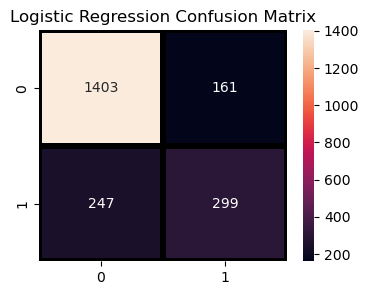

In [110]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(ytest, ypred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix")


In [112]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)

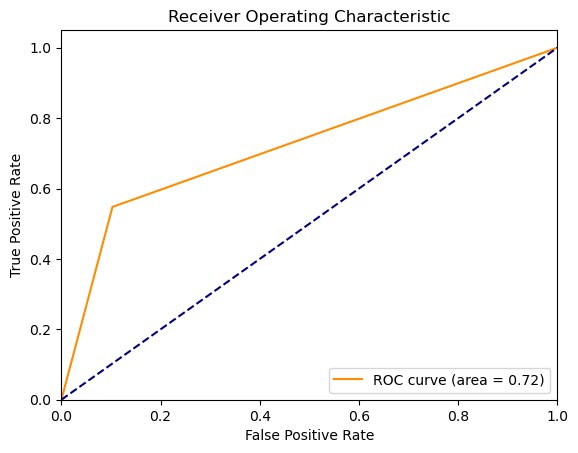

In [113]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Saving Model

In [114]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)